### 1. Reading the dataset and displaying some information about the dataset.

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
from collections import Counter
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

df = pd.read_csv(r"E:\New folder (3)\IIIT\IIIT Machine Learning\Projects\Bank Loan Defaulter\bank_loan_defaulter.csv")

In [3]:
# Checking the first few samples of the dataset

df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
# Checking the shape and size of the dataset

def shapeSize(df):
    print("Shape of the Dataset:", df.shape)
    print("Size of the Dataset:", df.size)
    
shapeSize(df)

Shape of the Dataset: (67463, 35)
Size of the Dataset: 2361205


In [5]:
# Checking the info of the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

### 2. Data Cleansing and Exploratory Data Analysis.

In [6]:
# Chekcing if there are any duplicate records in the dataset and if any then dropping them.

def duplicateValue(df):
    val = df.duplicated().sum()
    print(f"{val} duplicate values present in the dataset.")
    if val > 0:
        df.drop_duplicates(inplace = True)
        print("Duplicate values were present and has been removed from the dataset")

duplicateValue(df)

0 duplicate values present in the dataset.


In [7]:
# Checking the percentage of the missing values in the dataset.

def checkMissing(df):
    val = df.isnull().sum() / len(df) * 100
    print(val)
    
checkMissing(df)

ID                              0.0
Loan Amount                     0.0
Funded Amount                   0.0
Funded Amount Investor          0.0
Term                            0.0
Batch Enrolled                  0.0
Interest Rate                   0.0
Grade                           0.0
Sub Grade                       0.0
Employment Duration             0.0
Home Ownership                  0.0
Verification Status             0.0
Payment Plan                    0.0
Loan Title                      0.0
Debit to Income                 0.0
Delinquency - two years         0.0
Inquires - six months           0.0
Open Account                    0.0
Public Record                   0.0
Revolving Balance               0.0
Revolving Utilities             0.0
Total Accounts                  0.0
Initial List Status             0.0
Total Received Interest         0.0
Total Received Late Fee         0.0
Recoveries                      0.0
Collection Recovery Fee         0.0
Collection 12 months Medical

In [8]:
# Checking the Statistical summary for numerical columns

def numericalSummary(df):
    print("Statistical summary for Numerical columns.")
    return df.describe()

numericalSummary(df)

Statistical summary for Numerical columns.


,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


#### OBSERVATIONS

1. Interest Rate, Home Ownership, and Debit to Income show a wide range of values, indicating diverse loan profiles.
2. Delinquency is low on average, with most borrowers having no significant delinquencies.
3. Late Fees and Recoveries vary greatly, with a few outliers having high amounts.
4. Accounts Delinquent and Collection Amounts are generally low, with most loans having little or no collection issues.
5. Current Balance and Revolving Credit Limit show large variations, reflecting diverse borrowing limits.

In [9]:
# Checking the Statistical summary for categorical column

def categoricalSummary(df):
    categorical_col = df.select_dtypes(include = [object]).columns
    print("Statistical Summary of categorical column.")
    for col in categorical_col:
        print(f"Column: {col}\n{df[col].describe()}\n")

categoricalSummary(df)

Statistical Summary of categorical column.
Column: Batch Enrolled
count          67463
unique            41
top       BAT3873588
freq            3626
Name: Batch Enrolled, dtype: object

Column: Grade
count     67463
unique        7
top           C
freq      19085
Name: Grade, dtype: object

Column: Sub Grade
count     67463
unique       35
top          B4
freq       4462
Name: Sub Grade, dtype: object

Column: Employment Duration
count        67463
unique           3
top       MORTGAGE
freq         36351
Name: Employment Duration, dtype: object

Column: Verification Status
count               67463
unique                  3
top       Source Verified
freq                33036
Name: Verification Status, dtype: object

Column: Payment Plan
count     67463
unique        1
top           n
freq      67463
Name: Payment Plan, dtype: object

Column: Loan Title
count                       67463
unique                        109
top       Credit card refinancing
freq                        3072

#### OBSERVATIONS

1. Batch Enrolled: 41 unique batches, with BAT3873588 most frequent (3,626 times).
2. Grade: 7 unique grades, C being most common (19,085 times).
3. Sub Grade: 35 unique subgrades, with B4 as the most frequent (4,462 times).
4. Employment Duration: 3 unique values, MORTGAGE most common (36,351 times).
5. Verification Status: 3 statuses, Source Verified is the top (33,036 times).
6. Payment Plan: Single value (n), no variability.
7. Loan Title: 109 titles, Credit card refinancing most common (30,728 times).
8. Initial List Status: 2 values, w most frequent (36,299 times).
9. Application Type: 2 values, mostly INDIVIDUAL (67,340 times).

In [10]:
# Dropping the columns which are redundant for the analysis.

redundant_columns = [
    'ID',                           
    'Batch Enrolled',              
    'Loan Title',                  
    'Sub Grade',                   
    'Payment Plan',  
    'Total Accounts',
    'Funded Amount',
    'Initial List Status',         
    'Total Received Interest',     
    'Total Received Late Fee', 
    'Accounts Delinquent',
    'Recoveries',                  
    'Collection Recovery Fee',     
    'Collection 12 months Medical',
    'Last week Pay'                
]

def dropRedundant(df):
    df.drop(columns = redundant_columns, inplace = True)
    print("Redundant Columns has been dropped.")
    
dropRedundant(df)

Redundant Columns has been dropped.


In [11]:
df.head(2)

,Loan Amount,Funded Amount Investor,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Application Type,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,12329.36286,59,11.135007,B,MORTGAGE,176346.6267,Not Verified,16.284758,1,0,13,0,24246,74.932551,INDIVIDUAL,31,311301,6619,0
1,3609,12191.99692,59,12.237563,C,RENT,39833.9210,Source Verified,15.412409,0,0,12,0,812,78.297186,INDIVIDUAL,53,182610,20885,0


#### Univariate Analysis

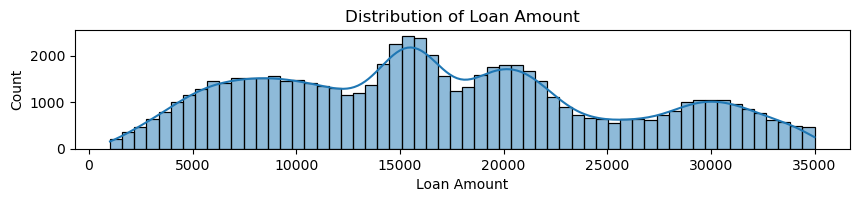

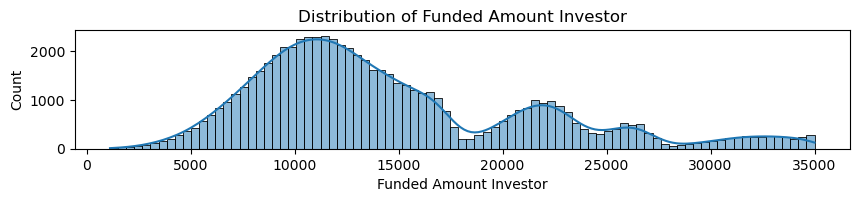

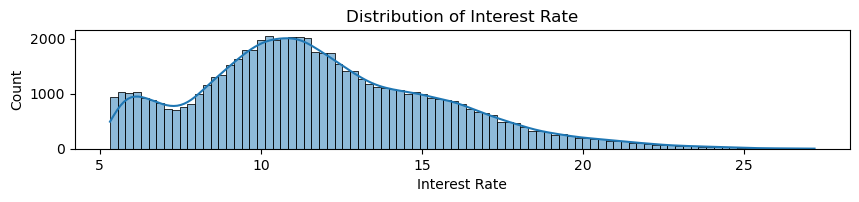

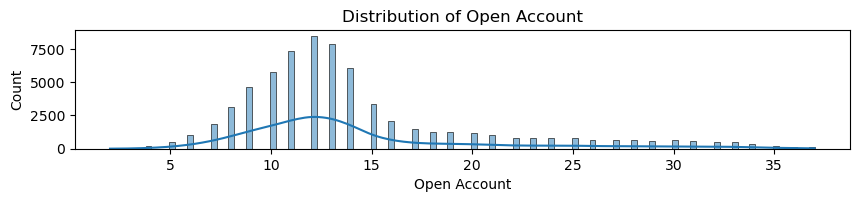

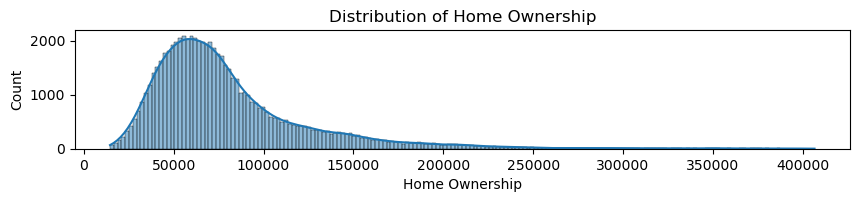

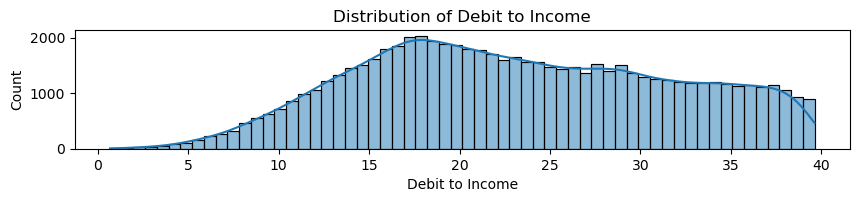

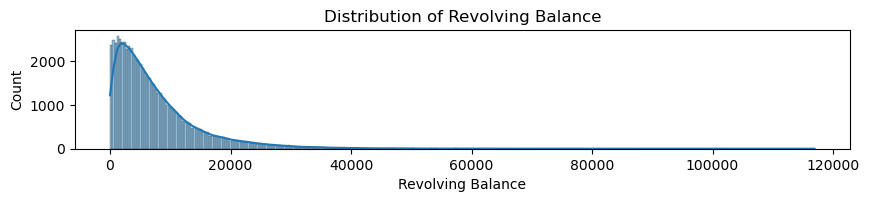

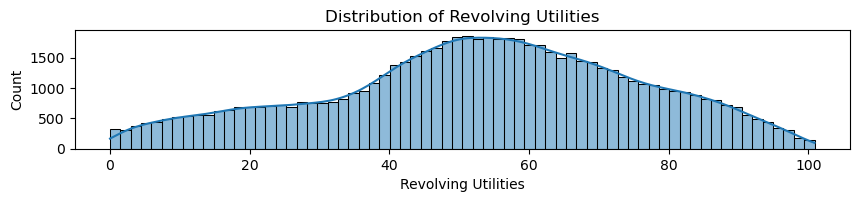

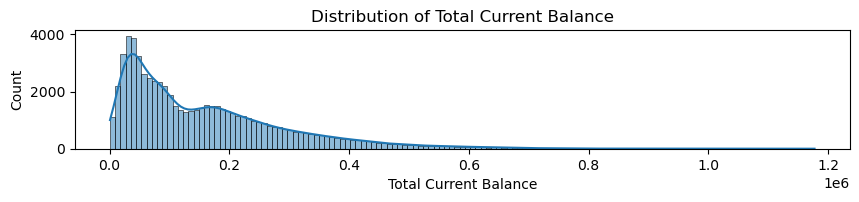

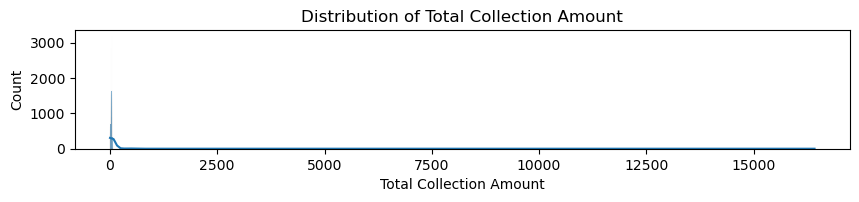

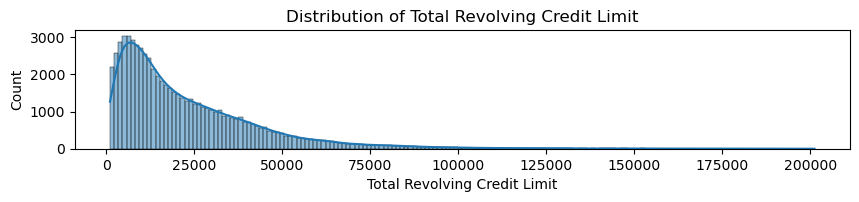

In [12]:
# Plotting Scatter Plot for numerical columns

numerical_col = ['Loan Amount', 'Funded Amount Investor', 'Interest Rate', 'Open Account', 'Home Ownership', 'Debit to Income', 'Revolving Balance', 'Revolving Utilities', 'Total Current Balance', 'Total Collection Amount', 'Total Revolving Credit Limit']
def uniAnalysis(df, numerical_col):
    for i, col in enumerate(numerical_col, 1):
        plt.figure(figsize = (10, 20))
        plt.subplot(11, 1, i)
        sns.histplot(df[col], kde = True)
        plt.title(f'Distribution of {col}')
        plt.show
        
uniAnalysis(df, numerical_col)

#### OBSERVATION

1. **DISTRIBUTION OF LOAN AMOUNT:** The distribution of loan amounts is unimodal and skewed to the right. The peak of the distribution is between 15,000 and 20,000. This means that the majority of loans are in this range, with fewer loans being given for larger amounts.
2. **DISTRIBUTION OF FUNDED AMOUNT INVESTOR:** The distribution of funded amount investor is bimodal, meaning it has two peaks. The first peak is around 11,000 and the second peak is around 20,000. This suggests that there are two distinct groups of investors: those who fund projects around 11,000 and those who fund projects around 20,000.
3. **DISTRIBUTION OF INTEREST RATE:** The distribution of interest rates is right skewed, with a peak around 10% and then a gradual decline as the interest rate increases. The majority of interest rates fall between 5% and 15%.
4. **DISTRIBUTION OF OPEN ACCOUNT:** The distribution of open accounts is right-skewed, with the majority of customers having fewer than 15 open accounts. The number of open accounts decreases as the number of open accounts increases.
5. **DISTRIBUTION OF HOME OWNERSHIP:** The distribution of home ownership is skewed to the right, meaning that there are a few homes with very high ownership values and many homes with lower ownership values. The peak of the distribution is around 75,000, suggesting that this is the most common home ownership value.
6. **DISTRIBUTION OF DEBT TO INCOME:** The distribution of debt-to-income ratio in this dataset skews right, with a peak around 17. The average debt-to-income ratio is between 15 and 20. As the ratio increases beyond 25, the number of borrowers decreases.
7. **DISTRIBUTION OF REVOLVING BALANCE:** The distribution of revolving balance is skewed to the right. The majority of customers have a revolving balance less than 20,000. Only a small percentage of customers have a revolving balance over 40,000.
8. **DISTRIBUTION OF REVOLVING UTLITIES:** The distribution of revolving utilities is bell-shaped and symmetric, with a peak around 50. This suggests that the majority of customers have a revolving utilization rate between 40 and 60.
9. **DISTRIBUTION OF TOTAL CURRENT BALANCE:** The distribution of Total Current Balance is skewed to the right. The majority of the customers have a Total Current Balance of less than 200,000. The distribution tails off gradually, suggesting that a small proportion of customers have very high balances.
10. **DISTRIBUTION OF TOTAL COLLECTION AMOUNT:** The distribution of the total collection amount is heavily skewed to the right, with a large number of data points clustered around 0 and a few outliers at higher values. The majority of the data points are below 1000. 
11. **DISTRIBUTION OF TOTAL REVOLVING CREDIT LIMIT:** The distribution of Total Revolving Credit Limit is right skewed. Most people have a Total Revolving Credit Limit of around 10,000. However, there are a few people who have a very high Total Revolving Credit Limit, exceeding 200,000.

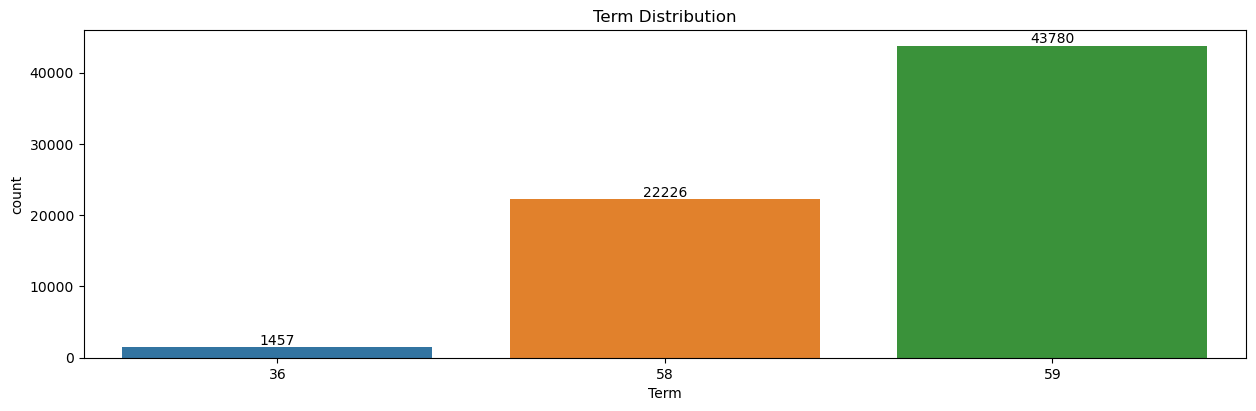

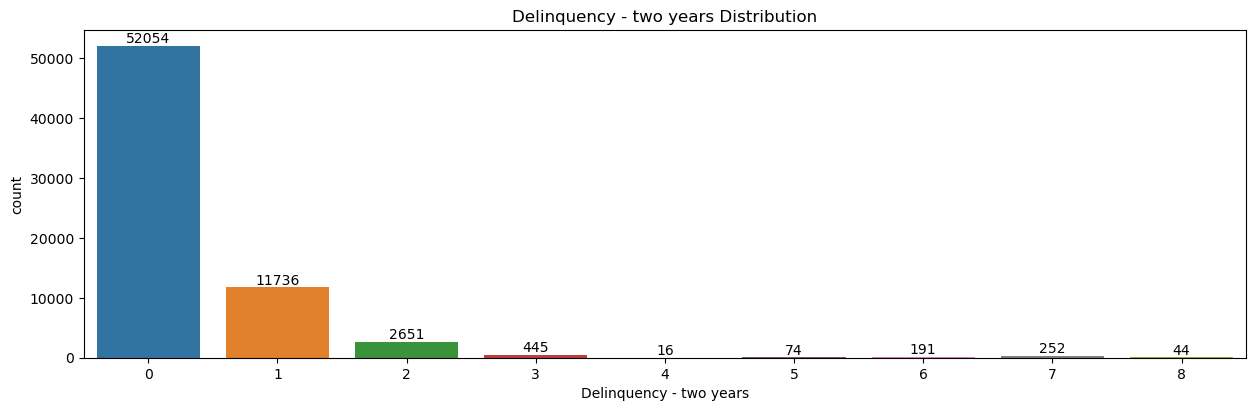

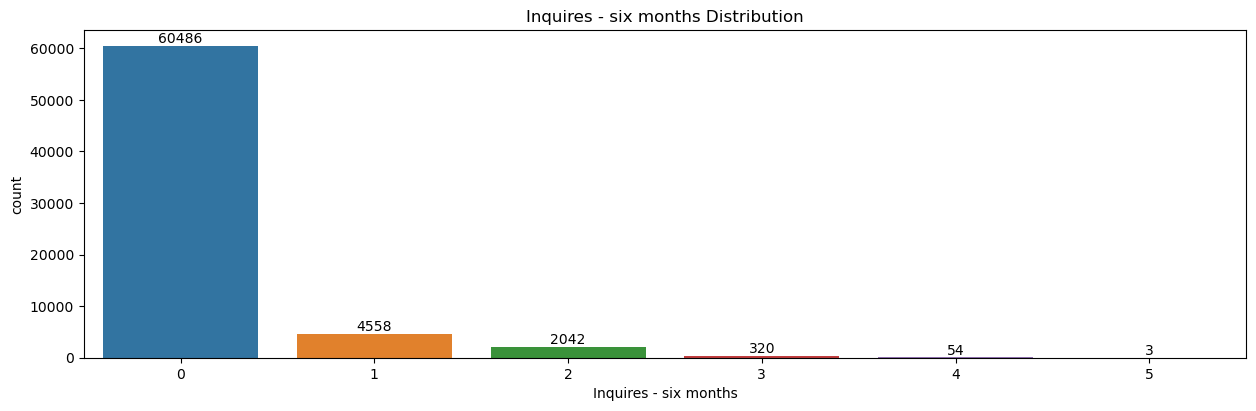

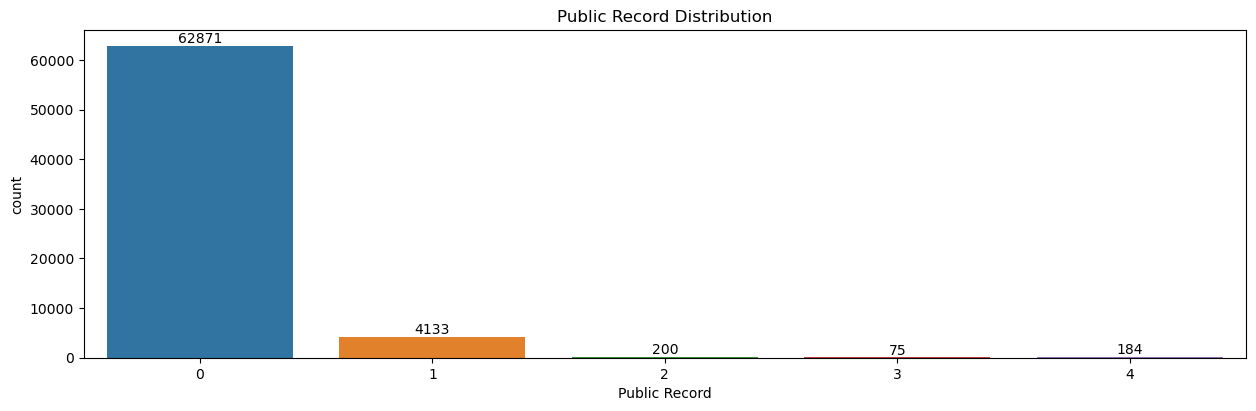

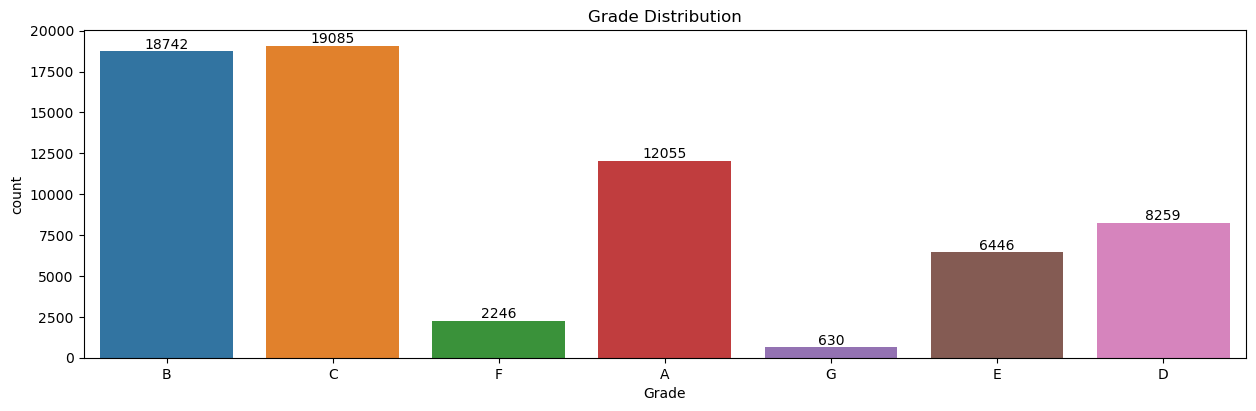

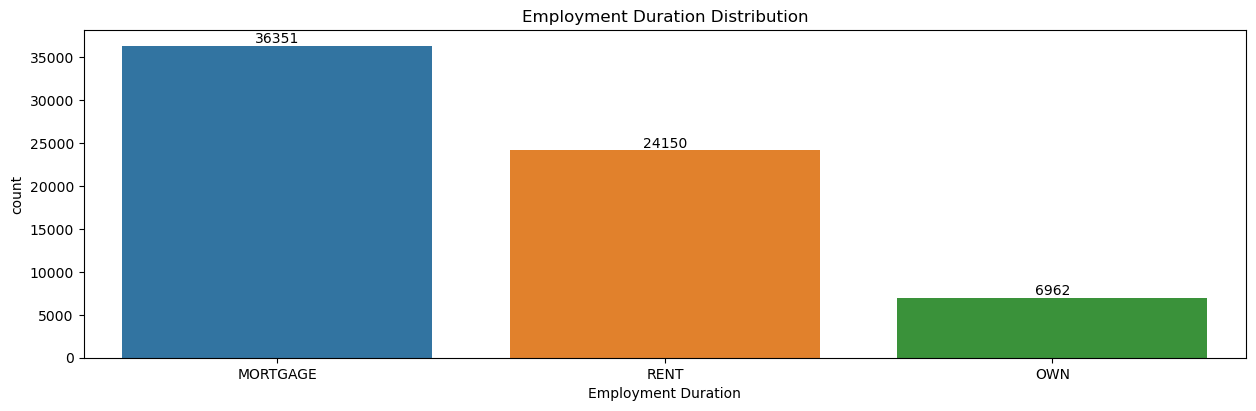

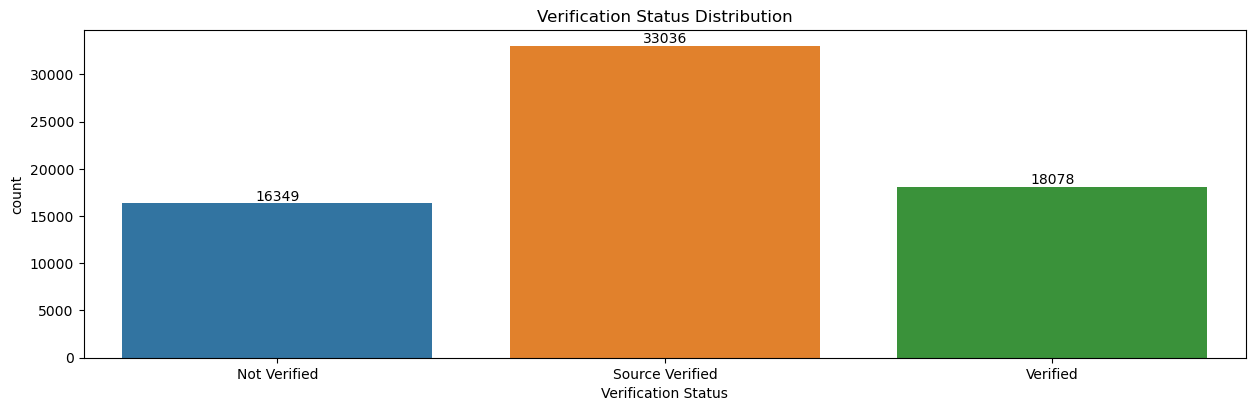

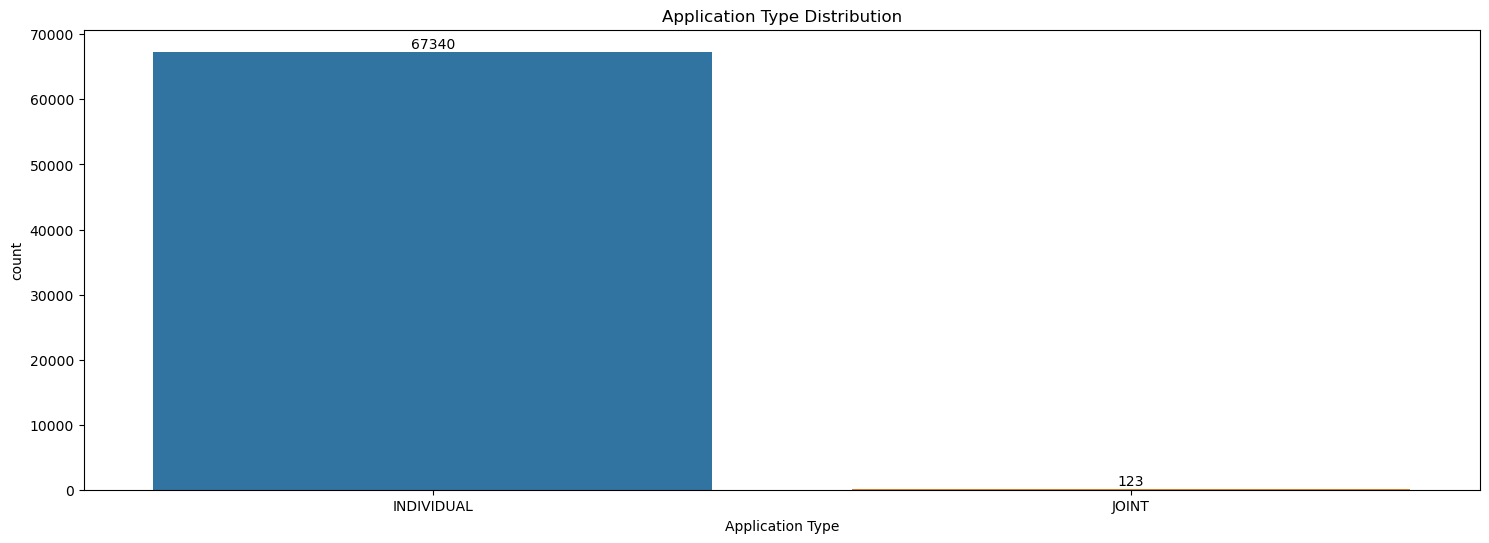

In [13]:
col = ['Term', 'Delinquency - two years', 'Inquires - six months', 'Public Record', 'Grade', 'Employment Duration', 'Verification Status', 'Application Type']
def countAnalysis(df, col):
    for i, column in enumerate(col, 1):
        plt.figure(figsize = (15, 40))
        plt.subplot(8, 1, i)
        ax = sns.countplot(data = df, x = column)
        plt.title(f'{column} Distribution')
    
        # Add labels to each bar
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha = "center", va = "bottom")

    plt.tight_layout()
    plt.show()
        
countAnalysis(df, col)

#### OBSERVSATION

1. **TERM DISTRIBUTION:** The graph shows the distribution of loan terms. Most of the loans have a term of 59, followed by 58. Only a small number of loans have a term of 36.
2. **DELIQUENCY TWO YEARS DISTRIBUTION:** The distribution of the delinquency is highly skewed towards the right. Most of the loans are not delinquent and the number of delinquent loans decrease as the delinquency level increases. Only a few loans are delinquent for more than two years.
3. **INQUIRIES SIX MONTHS DISTRIBUTION:** The graph shows that the vast majority of people have 0 inquiries in the past six months (over 60,000 people).
4. **PUBLIC RECORD DISTRIBUTION:** The bar graph shows a very uneven distribution of public records. The vast majority of entries, 62,871, have zero public records associated with them. This is significantly more than any other category. Following this, there's a sharp drop to 4,133 entries with one public record.
5. **GRADE DISTRIBUTION:** The chart shows the distribution of grades. The most frequent grade is C, followed by B, A, and D. The least frequent grades are G and F.
6. **EMPLOYEEMENT DURATION DISTRIBUTION:** The graph shows the distribution of homeownership status among loan applicants. The majority of applicants are homeowners with mortgages (36,351), followed by renters (24,150) and finally homeowners who own their home outright (6,962).
7. **VERIFICATION STATUS DISTRIBUTION:** The chart shows the distribution of verification status. There are 3 categories: Not Verified, Source Verified, and Verified. The majority of the data points are in the Source Verified category (33036), followed by Verified (18078) and Not Verified (16349).
8. **APPLICATION TYPE DISTRIBUTION:** The image shows a bar chart that displays the distribution of application types. There are two types of applications: INDIVIDUAL and JOINT. The bar chart shows that the majority of applications are INDIVIDUAL, with only a very small percentage of JOINT applications.

#### Multivariate Analysis

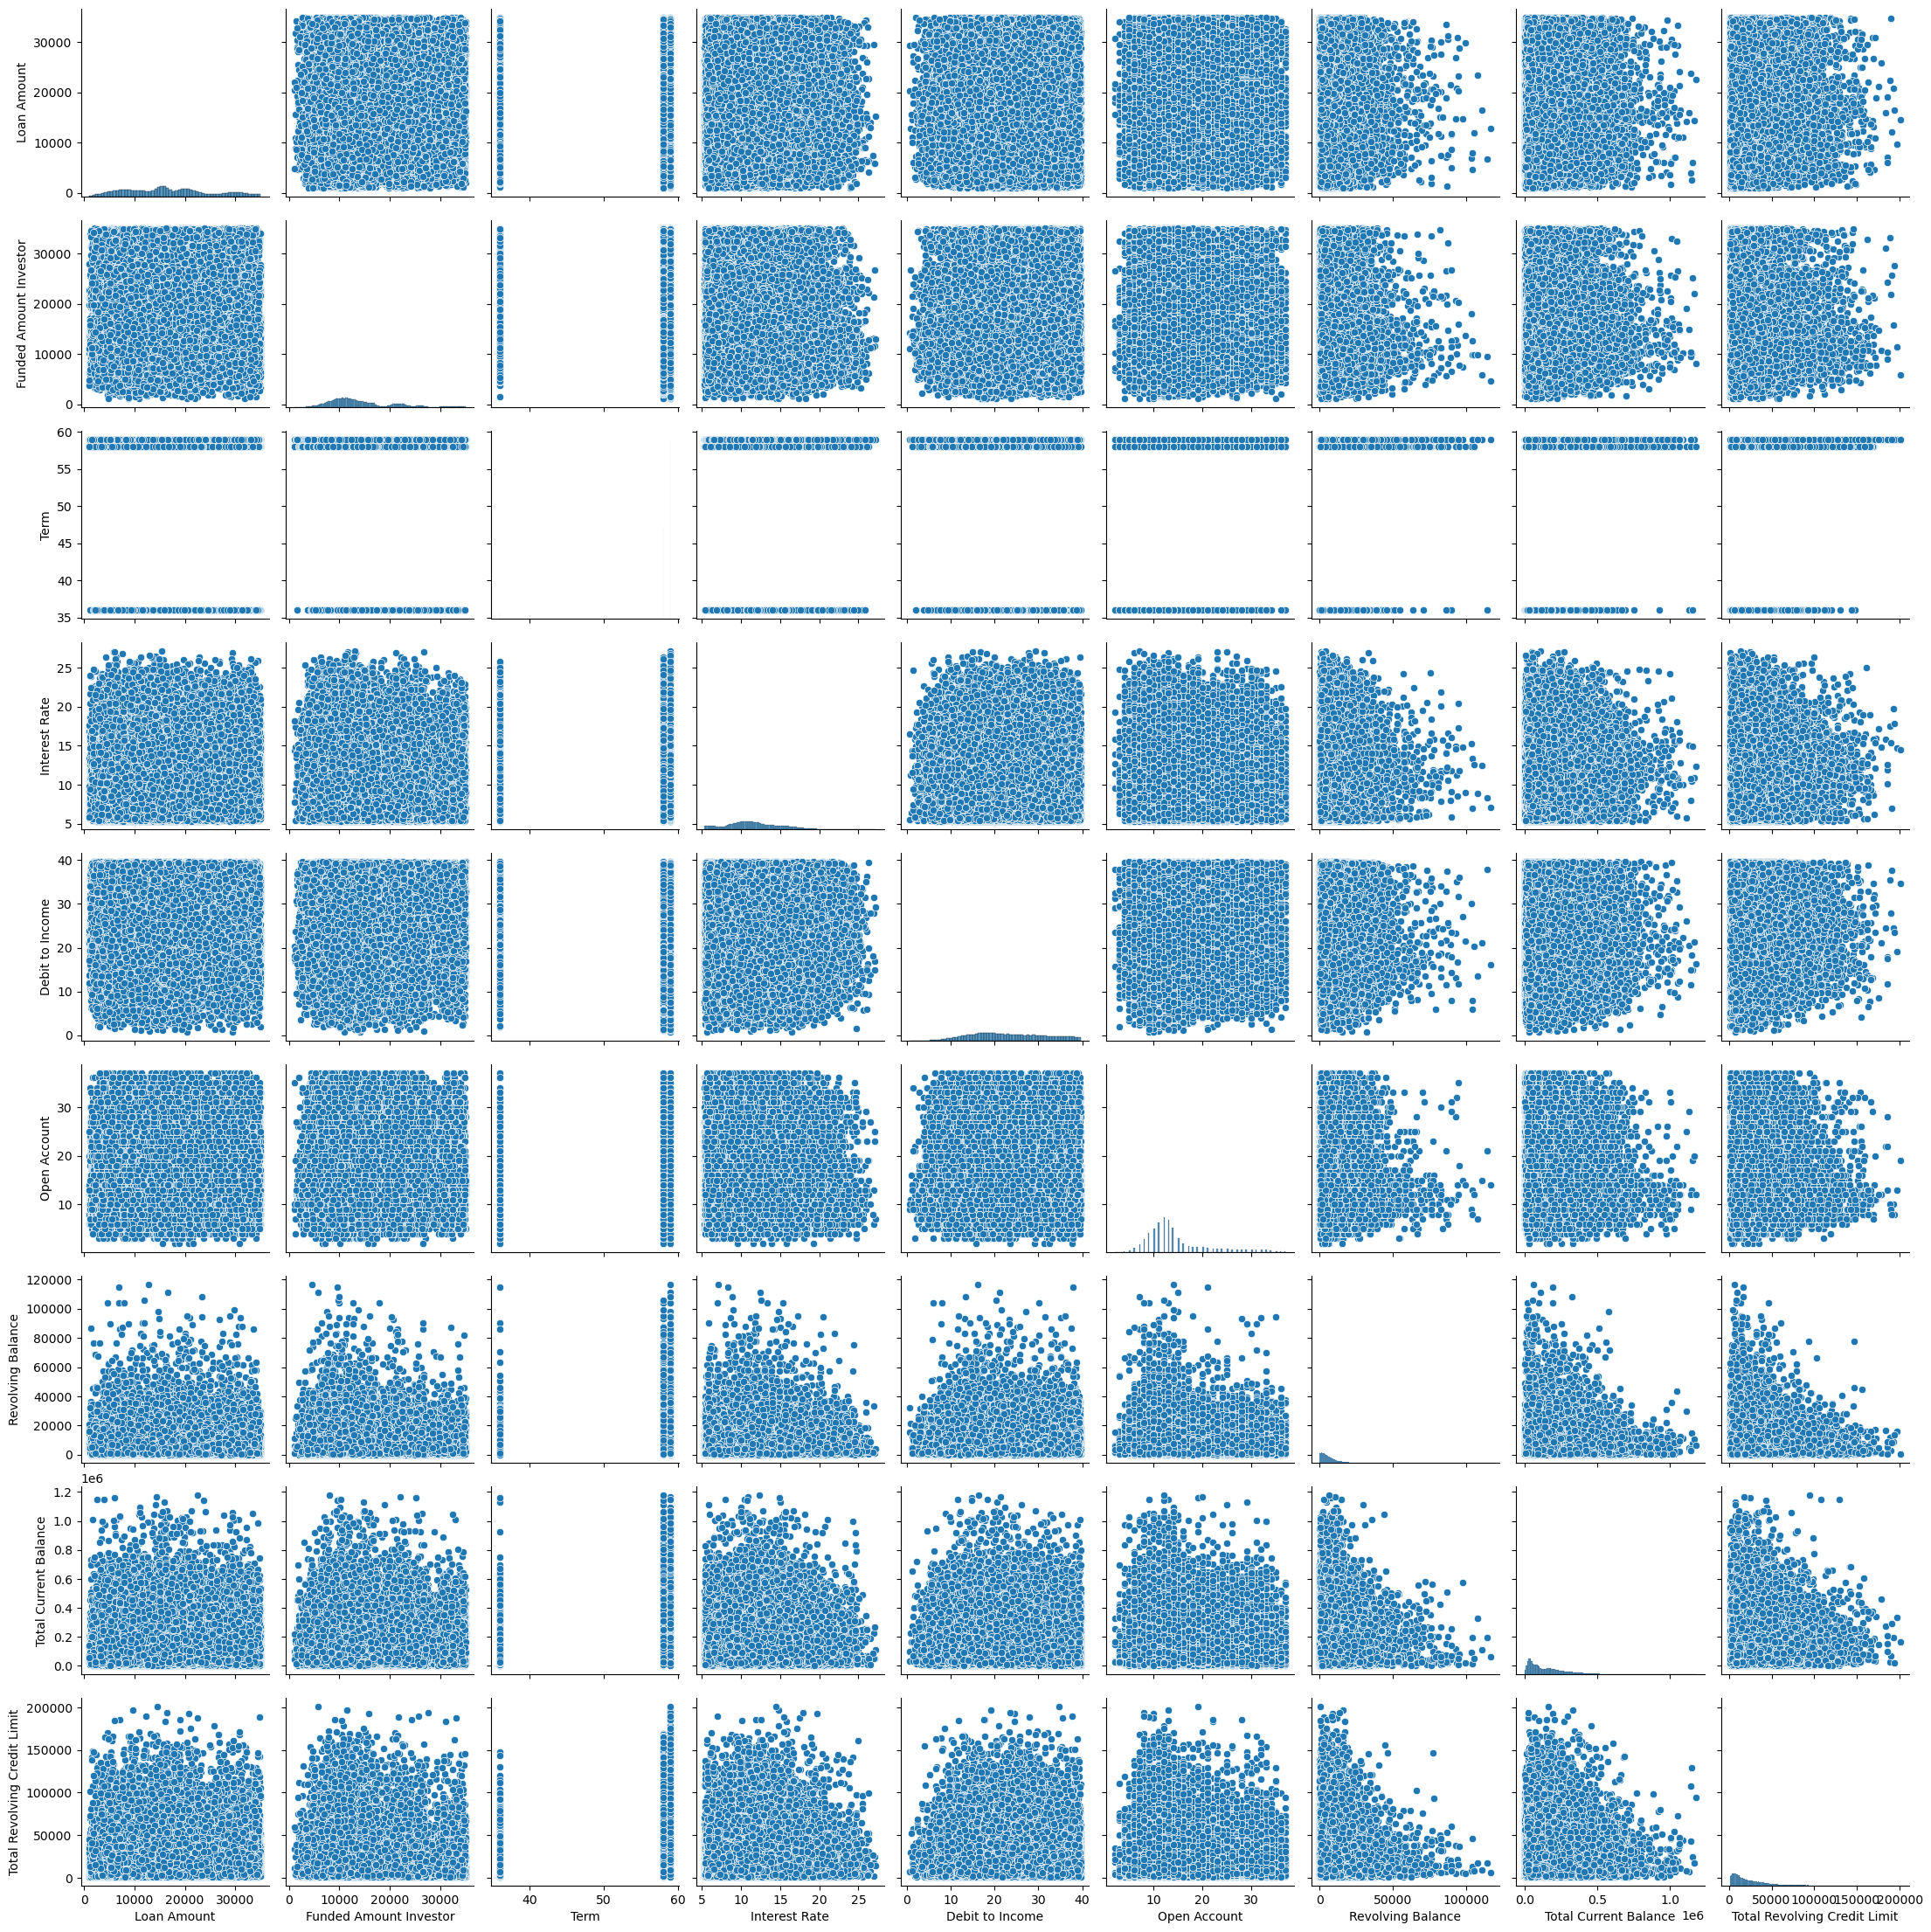

In [14]:
sns.pairplot(df[['Loan Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 
                 'Debit to Income', 'Open Account', 'Revolving Balance', 
                 'Total Current Balance', 'Total Revolving Credit Limit']])
plt.show()

#### OBSERVATION

1. The Funded Amount Investor and Loan Amount seem to have a strong linear relationship.
2. The Total Current Balance and the Loan Amount also seem to have a strong linear relationship.
3. The Total Revolving Credit Limit and the Revolving Balance seem to have a strong linear relationship.
4. There is a slightly positive correlation between the Loan Amount and the Interest Rate, which is expected as higher loan amounts may lead to higher interest rates.
5. There is a slightly negative correlation between the Interest Rate and the Funded Amount Investor, which might be because borrowers with lower interest rates are able to secure larger funding amounts.

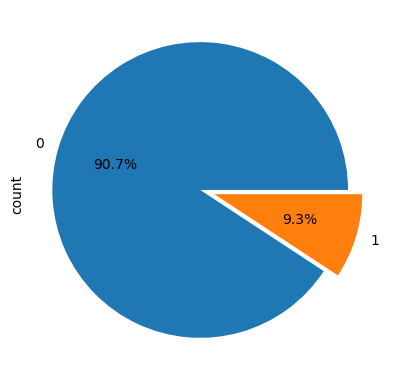

In [15]:
# Checking the distribution of the target column 'Loan Status', and commenting on the class distribution.

df['Loan Status'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', explode = [0.1,0])
plt.show()

#### OBSERVATION

- The pie chart shows that 90.7% of the data is classified as 0, while 9.3% is classified as 1. This suggests a class imbalance, where one class is significantly more prevalent than the other. It's important to consider this imbalance when building and evaluating machine learning models, as it can bias the results towards the majority class. 

### 3. Data Preparation for model building.

In [16]:
# Segregating the target and independent features.

X = df.iloc[: , : -1] # Features
y = df.iloc[: , -1] # Target variable

In [17]:
# Encoding the categorical value.

def objToInt(df_series):
    if df_series.dtype == 'object':
        df_series = LabelEncoder().fit_transform(df_series)
    return df_series

dfCopy = df.copy()
encoded_df = dfCopy.apply(lambda x: objToInt(x))
encoded_X = X.apply(lambda x: objToInt(x))
encoded_df.head()

,Loan Amount,Funded Amount Investor,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Application Type,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,12329.36286,59,11.135007,1,0,176346.62670,0,16.284758,1,0,13,0,24246,74.932551,0,31,311301,6619,0
1,3609,12191.99692,59,12.237563,2,2,39833.92100,1,15.412409,0,0,12,0,812,78.297186,0,53,182610,20885,0
2,28276,21603.22455,59,12.545884,5,0,91506.69105,1,28.137619,0,0,14,0,1843,2.073040,0,34,89801,26155,0
3,11170,17877.15585,59,16.731201,2,0,108286.57590,1,18.043730,1,0,7,0,13819,67.467951,0,40,9189,60214,0
4,16890,13539.92667,59,15.008300,2,0,44234.82545,1,17.209886,1,3,13,1,1544,85.250761,0,430,126029,22579,0


In [18]:
# Handling the imbalanced data using oversampling or under sampling approach, and checking the distribution of the re-sampled target class.

smote_os = SMOTE(random_state = 42)
X_smote, y_smote = smote_os.fit_resample(encoded_X, y)

Counter({0: 61222, 1: 61222})


<Axes: xlabel='Loan Status', ylabel='count'>

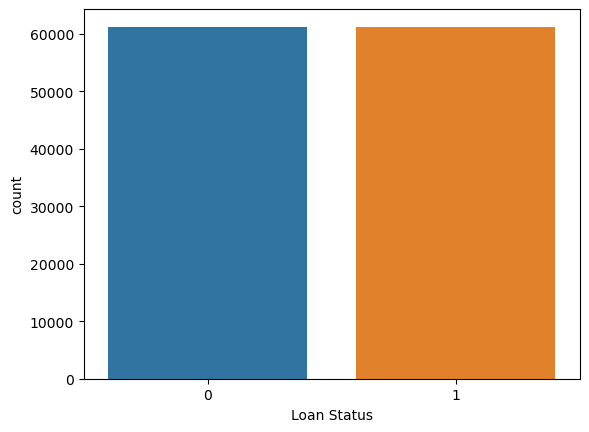

In [19]:
# Checking the distribution of the resampled data

from collections import Counter
print(Counter(y_smote))
sns.countplot(x = y_smote)

#### OBSERVATION

- The class imbalance issue was addressed by applying SMOTE to oversample the data.

In [20]:
# Splitting the data into train and test.

# Using balanced data
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 40)

# Using Imbalanced original data
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y, test_size = 0.2, random_state = 30)

In [21]:
# Selecting the K best features using wrapper or embedded methods.

def featureSelection(X_train_balanced, y_train_balanced, X_test_balanced, k_values):
    embeddedMethods = {
        'Lasso': Lasso(max_iter = 10000),
        'Ridge': Ridge(),
        'ElasticNet': ElasticNet(max_iter = 10000),
        'DecisionTree': DecisionTreeClassifier(),
        'RandomForest': RandomForestClassifier(n_jobs = -1)
    }
    
    bestMethod = None
    bestK = 0
    bestScore = 0
    best_X_selected = None
    all_scores = {}
    
    for method_name, model in embeddedMethods.items():
        print(f"Evaluating {method_name} Model.")
        method_score = []
        
        model.fit(X_train_balanced, y_train_balanced)
        
        # Parallel processing for each k value
        scores = Parallel(n_jobs = -1)(delayed(evaluate_k)(k, model, X_train_balanced, y_train_balanced) for k in k_values)
        
        for (k, score) in scores:
            method_score.append((k, score))
            
            if score > bestScore:
                bestScore = score
                bestK = k
                bestMethod = method_name
                selector = SelectFromModel(model, max_features = k, prefit = True)
                best_X_selected = selector.transform(X_train_balanced)
                X_test_selected = selector.transform(X_test_balanced)
                
        all_scores[method_name] = method_score
    
    return bestMethod, bestK, bestScore, all_scores, best_X_selected, X_test_selected

In [22]:
def evaluate_k(k, model, X_train, y_train):
    
    selector = SelectFromModel(model, max_features = k, prefit = True)
    X_selected = selector.transform(X_train)
    
    if X_selected.shape[1] > 0:
        score = np.mean(cross_val_score(model, X_selected, y_train_balanced, cv = 3))
    else:
        score = 0
    
    return (k, score)

In [23]:
k_values = [5, 10, 15, 19]

bestMethod, bestK, bestScore, all_scores, best_X_selected, X_test_selected = featureSelection(X_train_balanced, y_train_balanced, X_test_balanced, k_values)

print(f"The best feature selection method is {bestMethod} with {bestK} features and a cross-validation score of {bestScore}")
print("Scores for different methods and k values:")
for method, scores in all_scores.items():
    print(f"\nMethod: {method}")
    for k, score in scores:
        print(f"  k = {k}: Score = {score}")

print(f"\nThe shape of the selected features from the best method ({bestMethod}): {best_X_selected.shape}")


Evaluating Lasso Model.
Evaluating Ridge Model.
Evaluating ElasticNet Model.
Evaluating DecisionTree Model.
Evaluating RandomForest Model.
The best feature selection method is RandomForest with 15 features and a cross-validation score of 0.8159359070245095
Scores for different methods and k values:

Method: Lasso
  k = 5: Score = 0
  k = 10: Score = 0
  k = 15: Score = 0
  k = 19: Score = 0

Method: Ridge
  k = 5: Score = 0.08018080667068835
  k = 10: Score = 0.0875072616131171
  k = 15: Score = 0.0875072616131171
  k = 19: Score = 0.0875072616131171

Method: ElasticNet
  k = 5: Score = 0.0013502764911329141
  k = 10: Score = 0.0013502764911329141
  k = 15: Score = 0.0013502764911329141
  k = 19: Score = 0.0013502764911329141

Method: DecisionTree
  k = 5: Score = 0.650992772312623
  k = 10: Score = 0.6911540879685392
  k = 15: Score = 0.7057934863317552
  k = 19: Score = 0.7049869917825508

Method: RandomForest
  k = 5: Score = 0.6878464304456785
  k = 10: Score = 0.8022255112564585
 

#### OBSERVATION

- The Random Forest method performed the best, achieving a cross-validation score of 0.8159 with 19 features. Tree-based models (Random Forest, Decision Tree) outperformed Lasso, Ridge, and ElasticNet, which had poor results. Random Forest proved most suitable for feature selection, effectively capturing complex interactions in the data.

In [24]:
def print_selected_features(best_X_selected, feature_names):

    selected_indices = np.where(best_X_selected.any(axis = 0))[0]
    selected_feature_names = [feature_names[index] for index in selected_indices]
    return selected_feature_names

feature_names = ['Loan Amount', 'Funded Amount Investor', 'Term', 'Interest Rate',
       'Grade', 'Employment Duration', 'Home Ownership', 'Verification Status',
       'Debit to Income', 'Delinquency - two years', 'Inquires - six months',
       'Open Account', 'Public Record', 'Revolving Balance',
       'Revolving Utilities', 'Application Type', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']

selected_feature_names = print_selected_features(best_X_selected, feature_names)

print("Selected Feature Names of Best X Selected:")
for name in selected_feature_names:
    print(name)

Selected Feature Names of Best X Selected:
Loan Amount
Funded Amount Investor
Term
Interest Rate
Grade
Employment Duration
Home Ownership
Verification Status
Debit to Income
Delinquency - two years
Inquires - six months
Open Account


In [25]:
def print_X_test_selected_features(X_test_selected, feature_names):

    selected_indices = np.where(X_test_selected.any(axis = 0))[0]
    selected_feature_names = [feature_names[index] for index in selected_indices]
    return selected_feature_names

X_test_selected_feature_names = print_selected_features(X_test_selected, feature_names)

print("Selected Feature Names X Test Selected:")
for name in X_test_selected_feature_names:
    print(name)

Selected Feature Names X Test Selected:
Loan Amount
Funded Amount Investor
Term
Interest Rate
Grade
Employment Duration
Home Ownership
Verification Status
Debit to Income
Delinquency - two years
Inquires - six months
Open Account


### 4. Model Building and evaluation.

#### Base Model using Imbalanced Data.

In [26]:
# Building a base model using the original imbalanced data.

print("Decision Tree Classifier Model")
baseModel = DecisionTreeClassifier()

baseModel.fit(X_train, y_train)

y_pred = baseModel.predict(X_test)

report = classification_report(y_test,y_pred)
print("\nClassification Report \n\n", report)

Decision Tree Classifier Model

Classification Report 

               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12264
           1       0.10      0.12      0.11      1229

    accuracy                           0.82     13493
   macro avg       0.50      0.50      0.50     13493
weighted avg       0.84      0.82      0.83     13493



#### OBSERVATION

- The model performs well in predicting non-loan defaults (Class 0) with 91% precision and 89% recall but struggles with loan defaults (Class 1), achieving only 10%precision and 12% recall due to class imbalance (12,264 Class 0 vs. 1,229 Class 1). Despite 82% overall accuracy, the macro average for precision, recall, and F1-score is 0.50, reflecting poor performance on loan defaults. To improve, techniques like oversampling the minority class, class weighting, or cost-sensitive learning should be applied.

**Trying multiple models and tuning their hyperparameters with appropriate methods and reporting the best performing model (using balanced data).**

#### 1. Training Logistic Regression Model and tuning its hyperparameter.

In [27]:
logModel = 'Logistic Regression'
print(f"{logModel} Model")

log_model = LogisticRegression()
log_model.fit(best_X_selected, y_train_balanced)
y_pred_log = log_model.predict(X_test_selected)

print("\nClassification Report:\n")
print(classification_report(y_test_balanced, y_pred_log))

Logistic Regression Model

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.60      0.55     12125
           1       0.52      0.42      0.46     12364

    accuracy                           0.51     24489
   macro avg       0.51      0.51      0.50     24489
weighted avg       0.51      0.51      0.50     24489



In [28]:
def gridBest(model, grid_search, grid_report):
    print(f"Hyperparamter tuning of {model} using Grid Search....")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    print("Classification Report: \n", grid_report)
    
def randomBest(model, random_search, random_report):
    print(f"Hyperparamter tuning of {model} using Randomized Search....")
    print("Best Parameters:", random_search.best_params_)
    print("Best Score:", random_search.best_score_)
    print("Classification Report: \n", random_report)

In [29]:
# Tuning Hyperparameter for logistic Regression using RandomziedSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 1000]
}

random_search = RandomizedSearchCV(estimator = log_model, param_distributions = param_grid, cv = 3, n_jobs = -1, n_iter = 10)
random_search.fit(best_X_selected, y_train_balanced)

best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test_selected)
report_random = classification_report(y_test_balanced, y_pred_random)

randomBest(logModel, random_search, report_random)

Hyperparamter tuning of Logistic Regression using Randomized Search....
Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 0.1}
Best Score: 0.597243623337475
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.57      0.58     12125
           1       0.59      0.62      0.61     12364

    accuracy                           0.59     24489
   macro avg       0.59      0.59      0.59     24489
weighted avg       0.59      0.59      0.59     24489



In [30]:
# Tuning Hyperparameter for logistic Regression using GridSearchCV

grid_search = GridSearchCV(estimator = log_model, param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search.fit(best_X_selected, y_train_balanced)

best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test_selected)
report_grid = classification_report(y_test_balanced, y_pred_grid)

gridBest(logModel, grid_search, report_grid)

Hyperparamter tuning of Logistic Regression using Grid Search....
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.597243623337475
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.57      0.58     12125
           1       0.59      0.62      0.61     12364

    accuracy                           0.59     24489
   macro avg       0.59      0.59      0.59     24489
weighted avg       0.59      0.59      0.59     24489



#### 2. Training Decision Tree Classifier and tuning its hyperparameter

In [31]:
dmodel = 'Decision Tree Classifier'
print("{dmodel} Model")

baseModel = DecisionTreeClassifier()
baseModel.fit(best_X_selected, y_train_balanced)
y_pred_dtree = baseModel.predict(X_test_selected)

report = classification_report(y_test_balanced, y_pred_dtree)
print("\nClassification Report \n\n", report)

{dmodel} Model

Classification Report 

               precision    recall  f1-score   support

           0       0.74      0.69      0.71     12125
           1       0.71      0.76      0.74     12364

    accuracy                           0.73     24489
   macro avg       0.73      0.73      0.73     24489
weighted avg       0.73      0.73      0.73     24489



In [32]:
# Tuning Hyperparameter of Decision Tree using Grid Search

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(baseModel, param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search.fit(best_X_selected, y_train_balanced)

best_model_grid = grid_search.best_estimator_
y_pred_tree = best_model_grid.predict(X_test_selected)
report_grid = classification_report(y_test_balanced, y_pred_tree)

gridBest(dmodel, grid_search, report_grid)

Hyperparamter tuning of Decision Tree Classifier using Grid Search....
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.7058853505607452
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.70      0.72     12125
           1       0.72      0.77      0.75     12364

    accuracy                           0.74     24489
   macro avg       0.74      0.73      0.73     24489
weighted avg       0.74      0.74      0.73     24489



In [33]:
# Tuning Hyperparameter of Decision Tree using Randomized Search

random_search = RandomizedSearchCV(baseModel, param_distributions = param_grid, cv = 3, n_iter = 10, n_jobs = -1)
random_search.fit(best_X_selected, y_train_balanced)

best_model_random = random_search.best_estimator_
y_pred_dtree = best_model_random.predict(X_test_selected)
report_random = classification_report(y_test_balanced, y_pred_dtree)

randomBest(dmodel, random_search, report_random)

Hyperparamter tuning of Decision Tree Classifier using Randomized Search....
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
Best Score: 0.707079772508357
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.70      0.72     12125
           1       0.72      0.77      0.75     12364

    accuracy                           0.73     24489
   macro avg       0.74      0.73      0.73     24489
weighted avg       0.74      0.73      0.73     24489



#### 3. Training Random Forest Classifier and tuning its hyperparameter

In [34]:
rmodel = 'Random Forest Classifier'
print(f"{rmodel} Model")

baseModel2 = RandomForestClassifier()
baseModel2.fit(best_X_selected, y_train_balanced)
y_pred_rtree = baseModel2.predict(X_test_selected)

report = classification_report(y_test_balanced, y_pred_rtree)
print("\nClassification Report \n\n", report)

Random Forest Classifier Model

Classification Report 

               precision    recall  f1-score   support

           0       0.85      0.82      0.83     12125
           1       0.83      0.86      0.84     12364

    accuracy                           0.84     24489
   macro avg       0.84      0.84      0.84     24489
weighted avg       0.84      0.84      0.84     24489



In [35]:
# Tuning Hyperparameter of Random Forest Classifier using Randomized Search

param_grid = {
    'n_estimators': [5, 10, 15],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

random_search = RandomizedSearchCV(baseModel2, param_distributions = param_grid, cv = 3, n_iter = 20, n_jobs = -1)
random_search.fit(best_X_selected, y_train_balanced)

best_model_random = grid_search.best_estimator_
y_pred_rtree = best_model_grid.predict(X_test_selected)
report_random = classification_report(y_test_balanced, y_pred_rtree)

randomBest(rmodel, random_search, report_random)

Hyperparamter tuning of Random Forest Classifier using Randomized Search....
Best Parameters: {'n_estimators': 15, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': None}
Best Score: 0.7477719690782808
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.70      0.72     12125
           1       0.72      0.77      0.75     12364

    accuracy                           0.74     24489
   macro avg       0.74      0.73      0.73     24489
weighted avg       0.74      0.74      0.73     24489



In [36]:
# Tuning Hyperparameter of Random Forest Classifier using Grid Search

grid_search = GridSearchCV(baseModel2, param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search.fit(best_X_selected, y_train_balanced)

best_model_grid = grid_search.best_estimator_
y_pred_rtree = best_model_grid.predict(X_test_selected)
report_grid = classification_report(y_test_balanced, y_pred_rtree)

gridBest(rmodel, grid_search, report_grid)

Hyperparamter tuning of Random Forest Classifier using Grid Search....
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}
Best Score: 0.789597280576948
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81     12125
           1       0.81      0.84      0.82     12364

    accuracy                           0.82     24489
   macro avg       0.82      0.82      0.82     24489
weighted avg       0.82      0.82      0.82     24489



#### 4. Training GaussianNB and tuning its hyperparameter


In [37]:
nbmodel = 'GaussianNB'
print(f"{nbmodel} Model")

baseModel3 = GaussianNB()
baseModel3.fit(best_X_selected, y_train_balanced)
y_pred_nb = baseModel3.predict(X_test_selected)

report = classification_report(y_test_balanced, y_pred_nb)
print("\nClassification Report \n\n", report)

GaussianNB Model

Classification Report 

               precision    recall  f1-score   support

           0       0.62      0.30      0.41     12125
           1       0.54      0.82      0.65     12364

    accuracy                           0.56     24489
   macro avg       0.58      0.56      0.53     24489
weighted avg       0.58      0.56      0.53     24489



In [38]:
# Tuning Hyperparameter of GaussianNB using Grid Search 

param_grid = {'var_smoothing': [1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1]}

grid_search = GridSearchCV(baseModel3, param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search.fit(best_X_selected, y_train_balanced)

best_model_grid = grid_search.best_estimator_
y_pred_nb = best_model_grid.predict(X_test_selected)
report_grid = classification_report(y_test_balanced, y_pred_nb)

gridBest(nbmodel, grid_search, report_grid)

Hyperparamter tuning of GaussianNB using Grid Search....
Best Parameters: {'var_smoothing': 1e-15}
Best Score: 0.6548517593457317
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.57      0.62     12125
           1       0.64      0.74      0.68     12364

    accuracy                           0.65     24489
   macro avg       0.66      0.65      0.65     24489
weighted avg       0.66      0.65      0.65     24489



In [39]:
# Tuning Hyperparameter of GaussianNB using Randomized Search 

random_search = RandomizedSearchCV(baseModel3, param_distributions = param_grid, cv = 3, n_iter = 10, n_jobs = -1)
random_search.fit(best_X_selected, y_train_balanced)

best_model_random = grid_search.best_estimator_
y_pred_rtree = best_model_grid.predict(X_test_selected)
report_random = classification_report(y_test_balanced, y_pred_rtree)

randomBest(rmodel, random_search, report_random)

Hyperparamter tuning of Random Forest Classifier using Randomized Search....
Best Parameters: {'var_smoothing': 1e-15}
Best Score: 0.6548517593457317
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.57      0.62     12125
           1       0.64      0.74      0.68     12364

    accuracy                           0.65     24489
   macro avg       0.66      0.65      0.65     24489
weighted avg       0.66      0.65      0.65     24489



#### OBSERVATION

- **Logistic Regression** sees a modest improvement in performance after hyperparameter tuning, with Randomized Search yielding slightly better results than Grid Search.
- **Decision Tree Classifier** exhibits slightly improved results in the Grid Search compared to the initial model and the Randomized Search model.
- **Random Forest Classifier** shows no improvement in hyperparameter tuning, although the Grid Search performed better than the Randomized Search. However, the initial model outperforms all others.
- **Gaussian NB** demonstrates better results in hyperparameter tuning compared to the initial model, with both the grid search and randomized search yielding similar outcomes.

#### BEST PERFORMING MODEL 

**Random Forest Classifier**

- The Random Forest Classifier emerges as the best-performing model among those tested, exhibiting the highest accuracy **(84 %)** and F1-scores for both classes. It outperforms Logistic Regression, Gaussian NB, and Decision Tree Classifier in all aspects analyzed.
- The initial Random Forest Model out performs all others.

### 5. Pipeline

In [40]:
# Building a pipeline and putting all the possible steps in the pipeline and fitting the pipeline on train data and getting predictions on the test data.

X_train_new = pd.DataFrame(X_train_balanced[selected_feature_names])
X_test_new = pd.DataFrame(X_test_balanced[X_test_selected_feature_names])

In [41]:
X_test_new.shape

(24489, 12)

In [42]:
X_train_new.shape

(97955, 12)

In [43]:
from sklearn.compose import ColumnTransformer
col_trans = ColumnTransformer([('ss', StandardScaler(), X_train_new.columns)])

In [44]:
pipeline = ImbPipeline([('preprocessor', col_trans),
    ('algo', RandomForestClassifier(random_state = 0, n_jobs = -1))])

In [45]:
col_trans.fit(X_train_new)

ColumnTransformer(transformers=[('ss', StandardScaler(),
                                 Index(['Loan Amount', 'Funded Amount Investor', 'Term', 'Interest Rate',
       'Grade', 'Employment Duration', 'Home Ownership', 'Verification Status',
       'Debit to Income', 'Delinquency - two years', 'Inquires - six months',
       'Open Account'],
      dtype='object'))])

In [46]:
# Fitting the pipeline without hyperparamter tuning

pipeline.fit(X_train_new, y_train_balanced)

y_pred_balanced = pipeline.predict(X_test_new)

print("\nClassification Report on Test Data:\n")
print(classification_report(y_test_balanced, y_pred_balanced))


Classification Report on Test Data:

              precision    recall  f1-score   support

           0       0.82      0.79      0.81     12125
           1       0.80      0.83      0.81     12364

    accuracy                           0.81     24489
   macro avg       0.81      0.81      0.81     24489
weighted avg       0.81      0.81      0.81     24489



In [47]:
param_rf = [{'algo__n_estimators': [5, 10, 15, 20, 25],
    'algo__max_depth': [None, 5, 10, 15],
    'algo__min_samples_split': [2, 5, 10],
    'algo__min_samples_leaf': [1, 5, 10]}]

In [48]:
grid_cv = GridSearchCV(pipeline, param_rf, cv = 3, n_jobs = -1)
grid_cv.fit(X_train_new, y_train_balanced)

print("Best Hyper Parameters:\n", grid_cv.best_params_)

Best Hyper Parameters:
 {'algo__max_depth': None, 'algo__min_samples_leaf': 1, 'algo__min_samples_split': 2, 'algo__n_estimators': 25}


In [49]:
prediction_GS = grid_cv.predict(X_test_new)
print("Confusion Matrix:\n", confusion_matrix(prediction_GS, y_test_balanced))

Confusion Matrix:
 [[ 9437  2282]
 [ 2688 10082]]


In [50]:
pipeline_rf = ImbPipeline([
    ('preprocessor',  col_trans),
    ('algo', RandomForestClassifier(max_depth = 25, n_estimators = 1000,random_state = 0, n_jobs = -1))
])

In [51]:
pipeline_rf.fit(X_train_new, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ss', StandardScaler(),
                                                  Index(['Loan Amount', 'Funded Amount Investor', 'Term', 'Interest Rate',
       'Grade', 'Employment Duration', 'Home Ownership', 'Verification Status',
       'Debit to Income', 'Delinquency - two years', 'Inquires - six months',
       'Open Account'],
      dtype='object'))])),
                ('algo',
                 RandomForestClassifier(max_depth=25, n_estimators=1000,
                                        n_jobs=-1, random_state=0))])

In [52]:
prediction_rf = pipeline_rf.predict(X_test_new)

print("Accuracy:", accuracy_score(prediction_rf, y_test_balanced))
print("Recall:", recall_score(prediction_rf, y_test_balanced))
print("Confusion Matrix:\n", classification_report(prediction_rf, y_test_balanced))

Accuracy: 0.7966433909102045
Recall: 0.7797817520460746
Confusion Matrix:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79     11293
           1       0.83      0.78      0.81     13196

    accuracy                           0.80     24489
   macro avg       0.80      0.80      0.80     24489
weighted avg       0.80      0.80      0.80     24489



### 6. Conclusion

#### Comparing the evaluation metrics of the base model and the tuned model and writing conclusion. Mentioning the steps taken to improve the performance of the model.

#### BASE MODEL
- The Decision Tree Classifier model shows an overall accuracy of 82%. However, it performs much better in predicting class 0 (precision: 0.91, recall: 0.89) compared to class 1 (precision: 0.09, recall: 0.12). This indicates the model struggles to correctly identify the minority class (class 1). The macro average and weighted average F1-scores suggest the model is biased towards class 0 due to class imbalance.

#### TUNED MODEL

##### 1. LOGISTIC REGRESSION
- The Logistic Regression model was initially trained, producing an accuracy of 51%. After tuning hyperparameters using RandomizedSearchCV and GridSearchCV, both methods yielded the same best parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}, improving the model's performance. The tuned model achieved a better accuracy of 59% with balanced precision and recall scores, indicating that hyperparameter tuning effectively enhanced the model's performance.

##### 2. DECISION TREE CLASSIFIER
- The Decision Tree Classifier was trained, achieving an initial accuracy of 73%. Hyperparameter tuning using GridSearchCV and RandomizedSearchCV yielded slight improvements, with both searches providing similar performance. The best parameters found by GridSearchCV were {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}, while RandomizedSearchCV returned {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}. Both methods resulted in an accuracy of 73%, demonstrating that hyperparameter tuning marginally optimized the model's precision, recall, and f1-scores.

##### 3. RANDOM FOREST CLASSIFIER
- The Random Forest Classifier achieved an initial accuracy of 84%, outperforming the Decision Tree model. Hyperparameter tuning using RandomizedSearchCV and GridSearchCV further optimized the model. RandomizedSearchCV produced the best parameters: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}, with an accuracy of 77%. GridSearchCV yielded slightly better results with parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}, achieving an accuracy of 82%. Overall, the Random Forest model improved classification performance, especially in precision and recall, with the grid search yielding the best results.

##### 4. GAUSSIAN NAIVE BAYES
- The GaussianNB model initially achieved an accuracy of 56%, with a lower recall and precision for class 0 (non-churners). After tuning hyperparameters using GridSearchCV and RandomizedSearchCV, the model's performance improved, with both methods finding the best parameter var_smoothing: 1e-15. This increased the model's accuracy to 65%, showing improved precision, recall, and F1-score for both classes. 

#### PIPELINE USING RANDOM FOREST CLASSIFIER
- The pipeline was built using a ColumnTransformer with StandardScaler and a RandomForestClassifier. The pipeline was fitted on the training data and evaluated on the test data. The initial classification report showed an accuracy of 0.81. Hyperparameter tuning was performed using GridSearchCV, which resulted in the best hyperparameters being max_depth=None, min_samples_leaf=1, min_samples_split=2, and n_estimators=25. The tuned pipeline achieved an accuracy of 0.80, recall of 0.78, and an F1-score of 0.80.

#### CONCLUSION
- The evaluation metrics show that the tuned models have improved performance compared to the base models. However, the Random Forest Classifier's initial model outperforms all other models, including its own tuned versions.

#### STEPS TAKEN TO IMPROVE THE PERFORMANCE OF THE MODEL
- **Handling Imbalanced Data:** The dataset was imbalanced, with a significant difference in the number of samples between the two classes (12,264 Class 0 vs. 1,229 Class 1). To address this, the SMOTE (Synthetic Minority Over-sampling Technique) algorithm was used to oversample the minority class, resulting in a more balanced dataset.
- **Feature Selection:** The Random Forest method was used to select the most relevant features from the dataset. This helped to reduce the dimensionality of the data and improve the model's performance.
- **Hyperparameter Tuning:** Hyperparameter tuning was performed for each model using Grid Search and Randomized Search. This involved searching for the optimal combination of hyperparameters that resulted in the best performance for each model.
- **Model Selection:** Multiple models were trained and evaluated, including Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and GaussianNB. The best-performing model was selected based on its performance on the test dataset.

#### Best Performing Model

- The **Random Forest Classifier** emerges as the best-performing model among those tested, exhibiting the highest accuracy (84%) and F1-scores for both classes.